<a href="https://colab.research.google.com/github/Ishita95-harvad/GDP-Per-Capita-Gov-Expenditure-Trade/blob/main/GDP_Per_Capita_%7C_Gov_Expenditure_%7C_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDP Per Capita | Gov Expenditure | Trade**
A collection GDP per capita , Gov Expenditure and Trade data of all countries

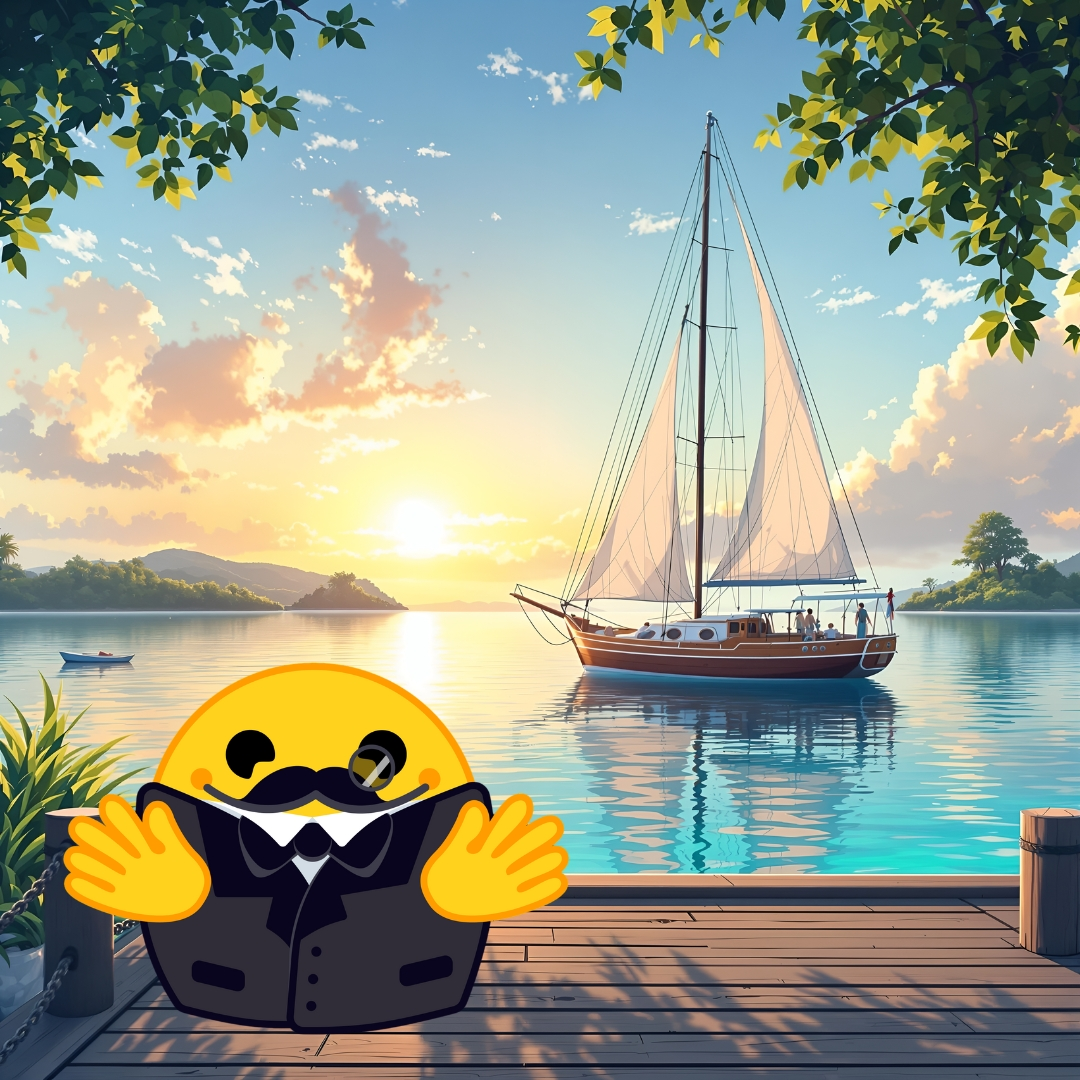

# Task
create and execute

Here is all the data you need:
"gdp_per_capita.csv"

## Data loading

### Subtask:
Load the GDP per capita data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the GDP per capita data from the provided CSV file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df_gdp = pd.read_csv('gdp_per_capita.csv')
    display(df_gdp.head())
except FileNotFoundError:
    print("Error: 'gdp_per_capita.csv' not found. Please ensure the file exists in the current directory.")
    df_gdp = None # or handle the error as needed
except pd.errors.EmptyDataError:
    print("Error: 'gdp_per_capita.csv' is empty.")
    df_gdp = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'gdp_per_capita.csv'. Check file format.")
    df_gdp = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_gdp = None

,Entity,Code,Year,GDP per capita,Value of global merchandise exports as a share of GDP,Government expenditure (% of GDP),Trade as a Share of GDP,"Inflation, consumer prices (annual %)"
0,Afghanistan,AFG,2005,964.4081,6.11945,NaN,NaN,12.686269
1,Afghanistan,AFG,2006,1057.0966,5.89436,NaN,NaN,6.784596
2,Afghanistan,AFG,2007,1259.9967,4.61202,NaN,NaN,8.680571
3,Afghanistan,AFG,2008,1319.6074,5.11368,NaN,NaN,26.418665
4,Afghanistan,AFG,2009,1557.3207,3.93394,NaN,NaN,-6.811161


## Data exploration

### Subtask:
Explore the loaded GDP per capita data to understand its structure, identify missing values, and examine the distribution of GDP per capita.


**Reasoning**:
Examine the shape, info, and descriptive statistics of the DataFrame; investigate unique values in categorical columns; and visualize the distribution of 'GDP per capita' and its trend over time.



Shape of the DataFrame: (147615, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147615 entries, 0 to 147614
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Entity                                                 147615 non-null  object 
 1   Code                                                   11408 non-null   object 
 2   Year                                                   147615 non-null  int64  
 3   GDP per capita                                         147615 non-null  float64
 4   Value of global merchandise exports as a share of GDP  132596 non-null  float64
 5   Government expenditure (% of GDP)                      8413 non-null    float64
 6   Trade as a Share of GDP                                143729 non-null  float64
 7   Inflation, consumer prices (annual %)                  143731 non-null  float

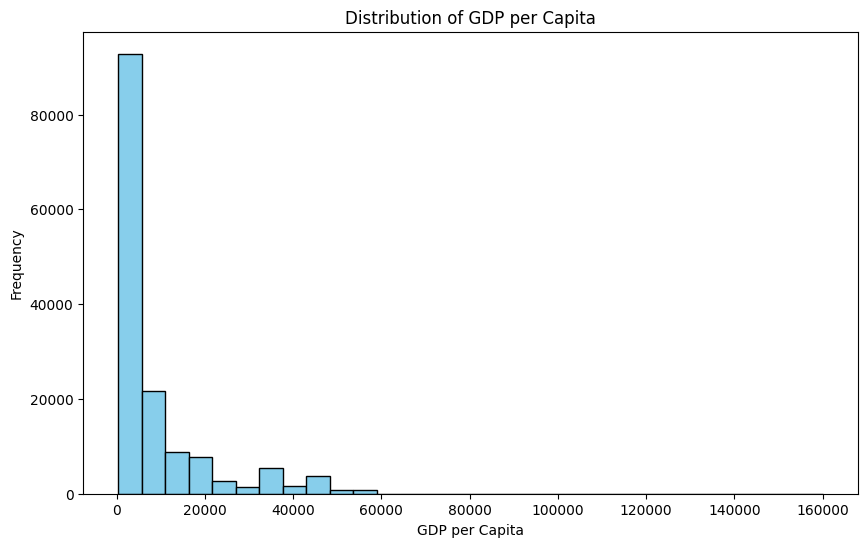

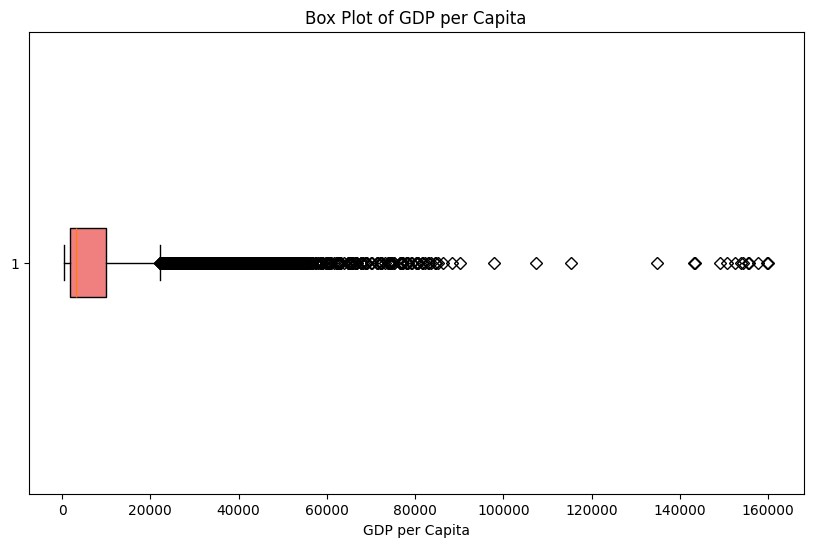

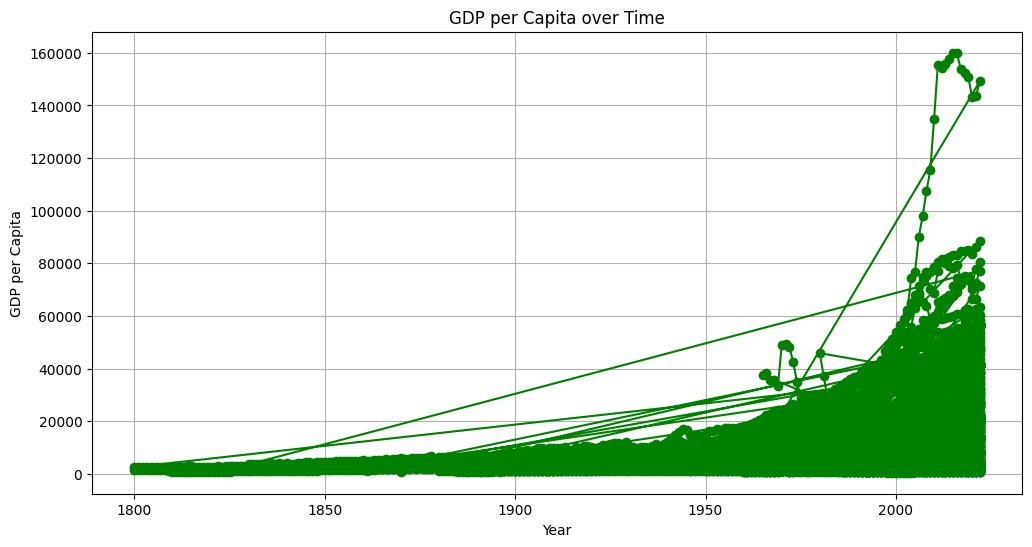

In [2]:
import matplotlib.pyplot as plt

# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_gdp.shape)

# Get a concise summary of the DataFrame
print("\nInfo:")
df_gdp.info()

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df_gdp.describe())

# Investigate unique values in categorical columns
print("\nUnique Entities:", df_gdp['Entity'].unique())
print("\nUnique Codes:", df_gdp['Code'].unique())

# Visualize the distribution of 'GDP per capita'
plt.figure(figsize=(10, 6))
plt.hist(df_gdp['GDP per capita'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df_gdp['GDP per capita'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black', marker='D'))
plt.title('Box Plot of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.show()

# Explore the data over time (assuming 'Year' column exists)
if 'Year' in df_gdp.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_gdp['Year'], df_gdp['GDP per capita'], marker='o', linestyle='-', color='green')
    plt.title('GDP per Capita over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP per Capita')
    plt.grid(True)
    plt.show()

## Data cleaning

### Subtask:
Clean the GDP per capita data by handling missing values and outliers.


**Reasoning**:
I will handle missing values in the 'GDP per capita' column using median imputation, then identify and remove outliers using the IQR method.  Finally, I will visualize the cleaned data and save it as 'df_gdp_cleaned'.



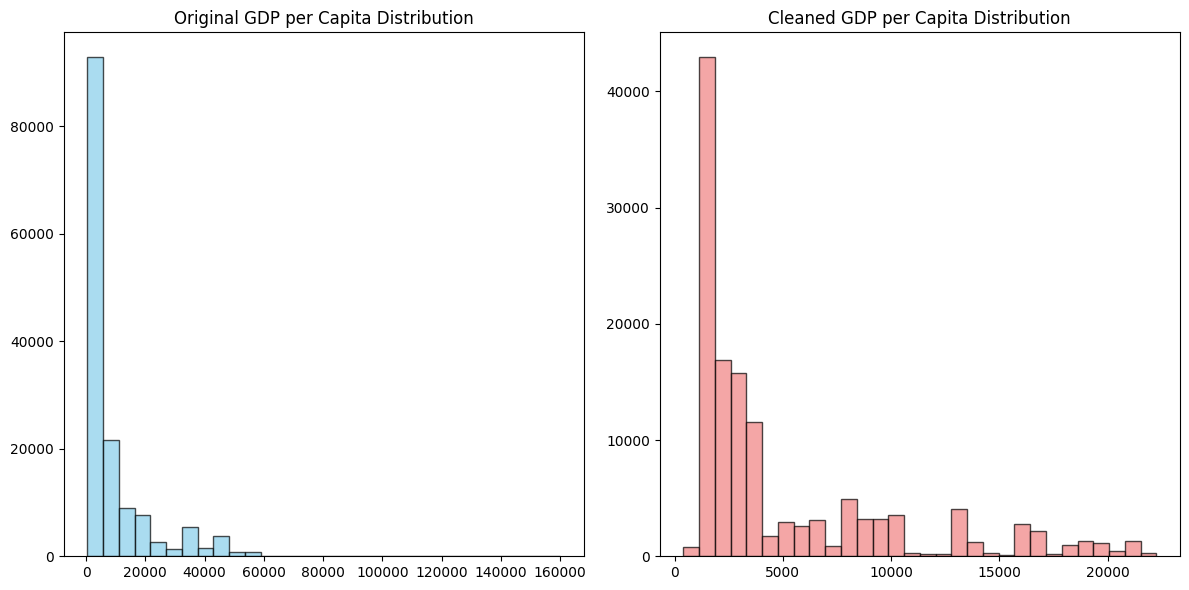

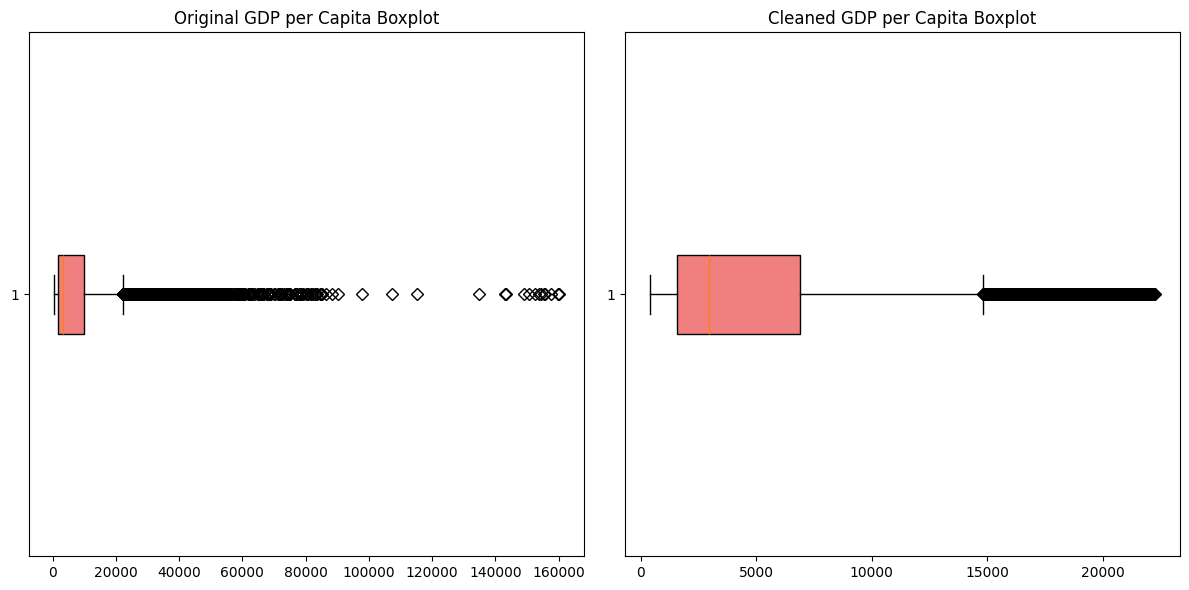

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values in 'GDP per capita' with the median
median_gdp = df_gdp['GDP per capita'].median()
df_gdp['GDP per capita'] = df_gdp['GDP per capita'].fillna(median_gdp)

# Outlier detection and removal using IQR
Q1 = df_gdp['GDP per capita'].quantile(0.25)
Q3 = df_gdp['GDP per capita'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_gdp_cleaned = df_gdp[df_gdp['GDP per capita'].between(lower_bound, upper_bound)]


# Data Validation: Compare original and cleaned distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_gdp['GDP per capita'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Original GDP per Capita Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_gdp_cleaned['GDP per capita'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Cleaned GDP per Capita Distribution')
plt.tight_layout()
plt.show()

# Boxplots for comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_gdp['GDP per capita'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black', marker='D'))
plt.title('Original GDP per Capita Boxplot')


plt.subplot(1,2,2)
plt.boxplot(df_gdp_cleaned['GDP per capita'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black', marker='D'))
plt.title('Cleaned GDP per Capita Boxplot')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Calculate and display key summary statistics for the cleaned GDP per capita data.


**Reasoning**:
Calculate and display key summary statistics for the cleaned GDP per capita data, including mean GDP per capita for each year if the 'Year' column exists.



In [4]:
# Calculate and display summary statistics for 'GDP per capita'
print("Summary statistics for 'GDP per capita':")
print(df_gdp_cleaned['GDP per capita'].describe())

# Print the number of data points after cleaning
print(f"\nNumber of data points after cleaning: {len(df_gdp_cleaned)}")

# Calculate and display mean GDP per capita for each year (if 'Year' column exists)
if 'Year' in df_gdp_cleaned.columns:
    print("\nMean GDP per capita for each year:")
    print(df_gdp_cleaned.groupby('Year')['GDP per capita'].mean())

Summary statistics for 'GDP per capita':
count    131204.000000
mean       5093.213523
std        5051.894028
min         403.601900
25%        1599.000000
50%        2973.457500
75%        6892.250000
max       22254.000000
Name: GDP per capita, dtype: float64

Number of data points after cleaning: 131204

Mean GDP per capita for each year:
Year
1800     1955.744000
1801     1972.384750
1802     2026.240000
1803     1996.742000
1804     1949.956400
            ...     
2018    11940.546452
2019    12093.109501
2020    11668.666212
2021    12286.406671
2022    12554.299520
Name: GDP per capita, Length: 223, dtype: float64


## Data visualization

### Subtask:
Visualize the distribution and trends in the cleaned GDP per capita data.


**Reasoning**:
Visualize the distribution and trends in the cleaned GDP per capita data using a histogram, box plot, and line plot over time.



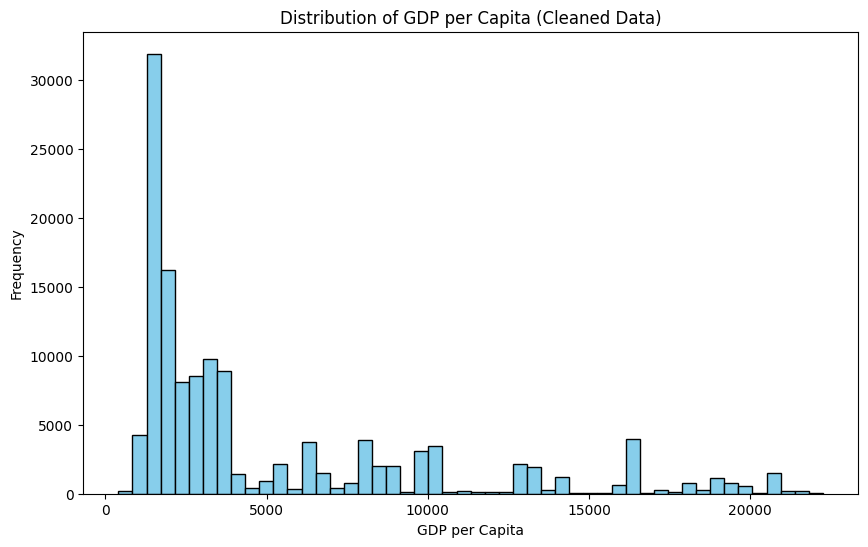

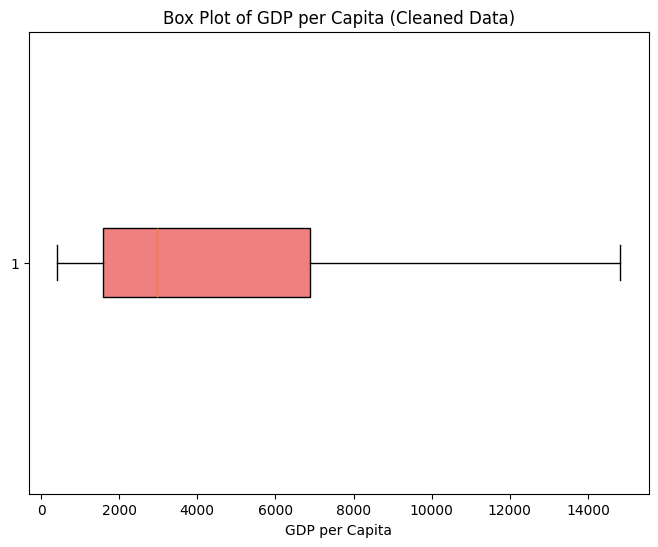

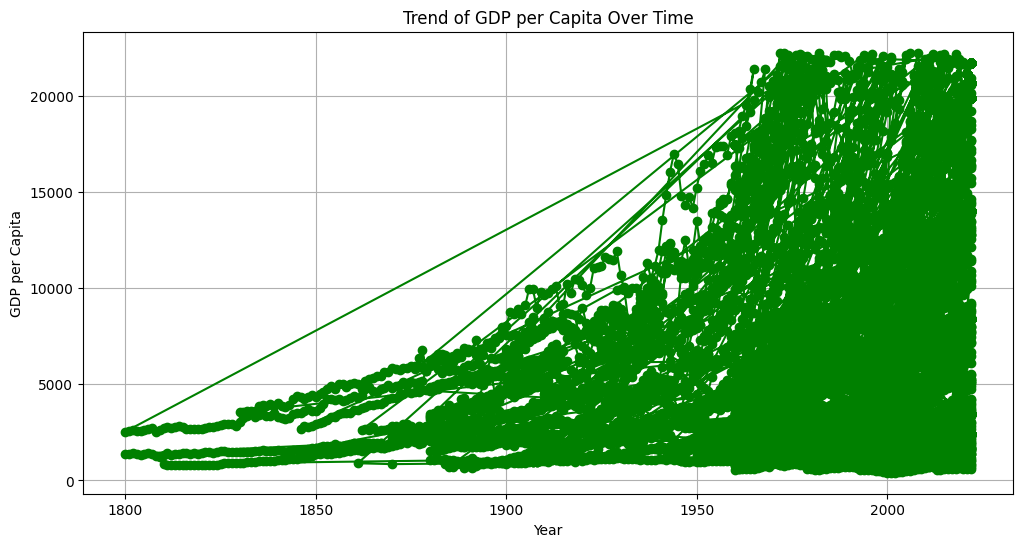

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of 'GDP per capita'
plt.figure(figsize=(10, 6))
plt.hist(df_gdp_cleaned['GDP per capita'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of GDP per Capita (Cleaned Data)')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

# Generate a box plot of 'GDP per capita'
plt.figure(figsize=(8, 6))
plt.boxplot(df_gdp_cleaned['GDP per capita'], vert=False, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor='lightcoral', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black', marker='D'))
plt.title('Box Plot of GDP per Capita (Cleaned Data)')
plt.xlabel('GDP per Capita')
plt.show()


# Create a line plot of 'GDP per capita' over time (if 'Year' column exists)
if 'Year' in df_gdp_cleaned.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_gdp_cleaned['Year'], df_gdp_cleaned['GDP per capita'], marker='o', linestyle='-', color='green')
    plt.title('Trend of GDP per Capita Over Time')
    plt.xlabel('Year')
    plt.ylabel('GDP per Capita')
    plt.grid(True)
    plt.show()

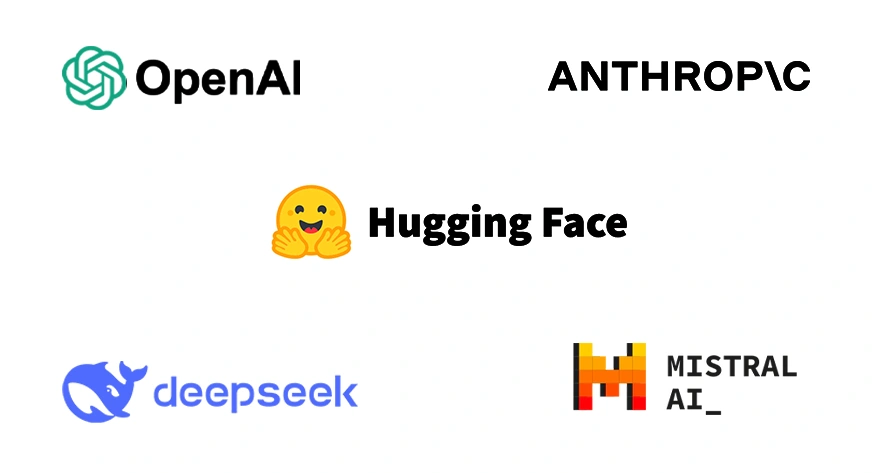